# ___
# [ Geoinformatika ]

## Strojové a hluboké učení


**Katedra aplikované geoinformatiky a kartografie**, Přírodovědecká fakulta, Univerzita Karlova
Albertov 6, 128 43 Praha 2

*Lukáš Brodský lukas.brodsky@natur.cuni.cz*

### Rozhodovací strom *(Decision tree)* v Pythonu 
s pomocí knihovny Scikit Learn

In [42]:
# Knihovny
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Jupyter notebook vizualizace
%matplotlib inline 

# for encoding
from sklearn.preprocessing import LabelEncoder
# for train test splitting
from sklearn.model_selection import train_test_split
# for decision tree object
from sklearn.tree import DecisionTreeClassifier
# for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
# for visualizing tree 
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

In [4]:
# vstupni data
df = sns.load_dataset('iris') 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Explorace vstupnich dat 

In [10]:
# zakladni info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

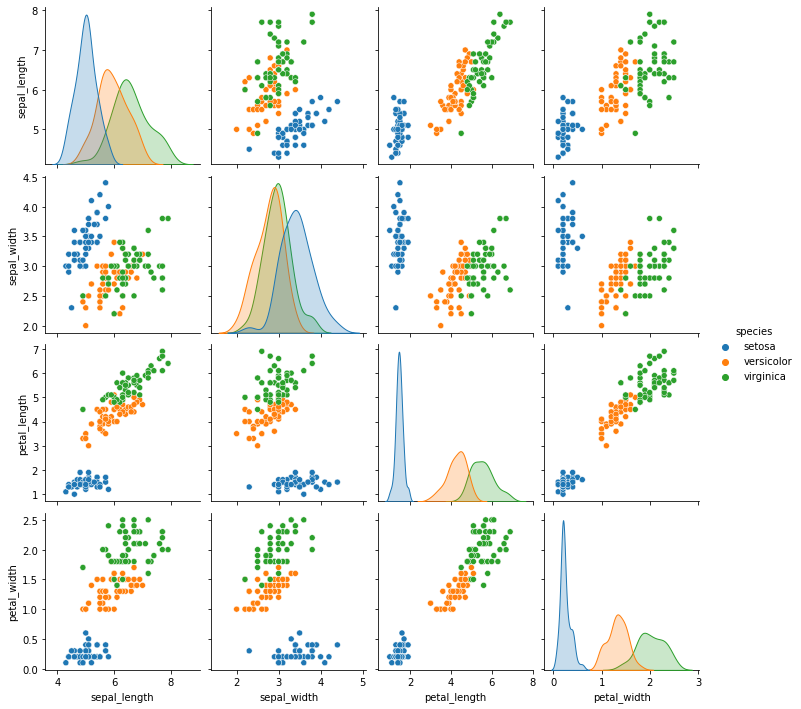

In [9]:
# vizualizace atributu
sns.pairplot(data=df, hue = 'species')

<AxesSubplot:>

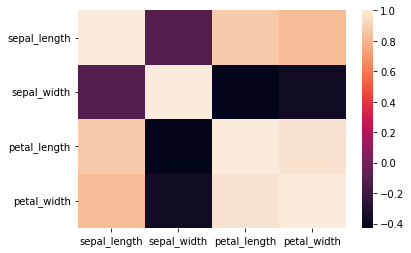

In [11]:
# correlation matrix 
sns.heatmap(df.corr())

## Priprava dat

In [13]:
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)

In [14]:
# Defining the attributes 
X = df1

In [15]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [17]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target) 
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
y = target

In [19]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


## Modeling Tree and testing it

In [21]:
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier() 
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [22]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

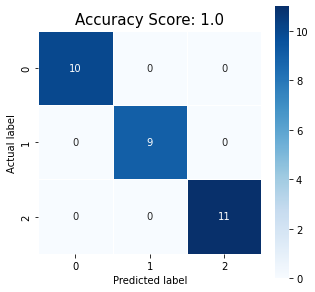

In [31]:
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

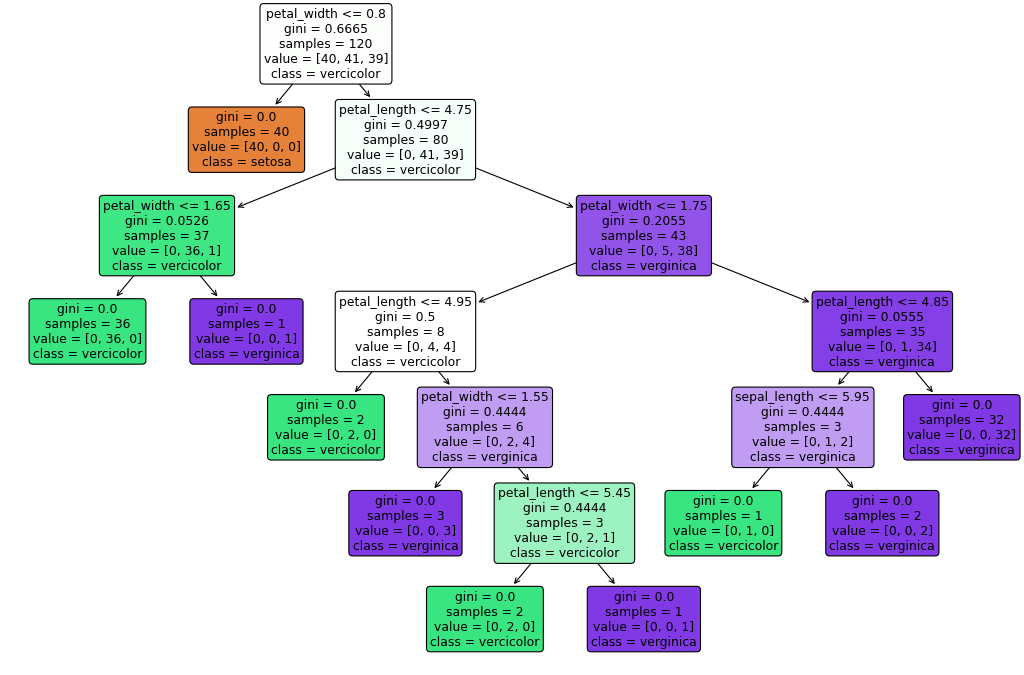

In [41]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20)) 
figure(figsize=(15, 10), dpi=80)
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns,
class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)